# Deutsch Jozsa Algorithm :

## The Deutsch-Jozsa Problem:

Imagine you're on a game show, and the host has a list of numbers. They've sorted these numbers into two groups. Now, they're going to play a game with you.

Here are the rules:

1. You pick any number from the list and hand it to the host.

2. The host then tells you either '0' or '1'.

3. Now, here's the tricky part: (*The host could be doing one of two things:*)

   - They might have split the numbers into two groups and assigned **'0'** to one group and **'1'** to the other. So, when you give them a number, they'll tell you the group it belongs to (**'0' or '1'**).

   - Or, they might just always say **'0'** or always say **'1'** no matter what number you give them.

Your job as the contestant is to figure out which of these two scenarios the host is following. ***Did they split the numbers into groups, or are they just always saying the same thing?***

To win, you need to figure out the pattern the host is using. This problem is interesting because with a classical computer, you might have to test many numbers to figure out the pattern. But with a quantum computer and the Deutsch-Jozsa algorithm, you can find out the answer much more efficiently.

## Classical Algorithm :

Step One - let’s model this into an algorithm.

1. **Input (Query)**: You, as the contestant, choose a number from a list. This number is your "query" or input to the game. Let's say this list contains several numbers, and you pick one of them.

2. **Oracle (Unknown Function)**: The host, who has some secret way **(black box)** of determining the answer, takes your number (the query) and does something with it. We call this secret process the **"oracle"**. The oracle could work in one of three ways:

   - It might always return '0' for every query, no matter what number you choose.

   - It might always return '1' for every query, again, regardless of the number you choose.

   - Or, it might have split the list of numbers into two groups and assigned **'0'** to one group and **'1'** to the other. So, when you give them a number, they'll tell you the group it belongs to (**'0' or '1'**).

4. **Output**: After the host applies their secret process (oracle) to your chosen number, they give you an answer, either **'0'** or **'1'**. This answer is the output of the game.

So, essentially, you give the host a number, they do something with it using their secret process, and then they tell you '0' or '1'. Your goal is to figure out what the host's secret process is. Are they always saying '0', always saying '1', or splitting the numbers into two groups?

This is what the algorithm should look like. Pass a query to the Oracle, and receive an ouput.

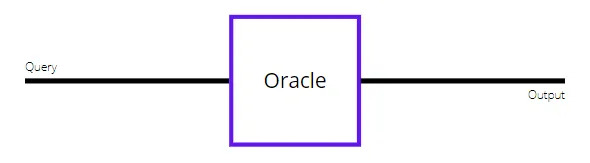
$$\textit{The classical algorithm has one input and one output}$$

## The Classical Solution:

1. **Oracle Returns '0' or '1' Once**: If the host's secret process returns '0' for one query and '1' for another, you can conclude that the host is splitting the numbers into two groups ('0' and '1'). This means it's balanced.

2. **Oracle Constantly Returns the Same Value**: Now, if the host keeps giving you the same answer, say '0', for all your queries, you can't immediately conclude whether the oracle is always saying '0' or splitting the numbers. You have to keep querying.

3. **Determining Constantly One or Zero**: Let's say you have 10 numbers. The host keeps saying '0' for all your queries. If you've queried the first 5 numbers and they all resulted in '0', you know that half of the numbers belong to the '0' group. Now, when you query the sixth number and it's also '0', you might suspect that it's constantly '0'. But to be sure, you need to query more. If the sixth, seventh, eighth, and so on, numbers also return '0', then you can confidently conclude that the host is constantly saying '0'. Similarly, if you're testing for constantly '1', you'd do the same with a different set of numbers.

In summary, to conclude whether the host is constantly saying '0' or '1', you need to test enough numbers to be sure that the pattern doesn't change. This might require testing half of the input domain to make a definitive conclusion.

***To conclude ‘Constantly One’ or ‘Constantly Zero’, you need to go through half of the input domain, and have the next number agree with previous answers.***

## Run-Time Complexity:

The Classical Solution is *problematic*. One way of measuring an algorithm’s efficiency at run-time (for each use) is via **‘Big-O Notation’**. In short, this measures the number of queries needed in the worst case scenario for any algorithm.

Let’s call the size of the input domain ‘n’.

In the worst case, we go through half of the input domain, and get identical outputs. That’s already $n/2$ queries.
From the very next query $(+1)$, we can determine our result — agreed output means a ***constant Oracle***, whereas the opposite output means a ***balanced Oracle***.
$$O(\frac{n}{2} +1)$$

The problem scales with size, being proportional to n. For massive input domains, it’ll be slow.

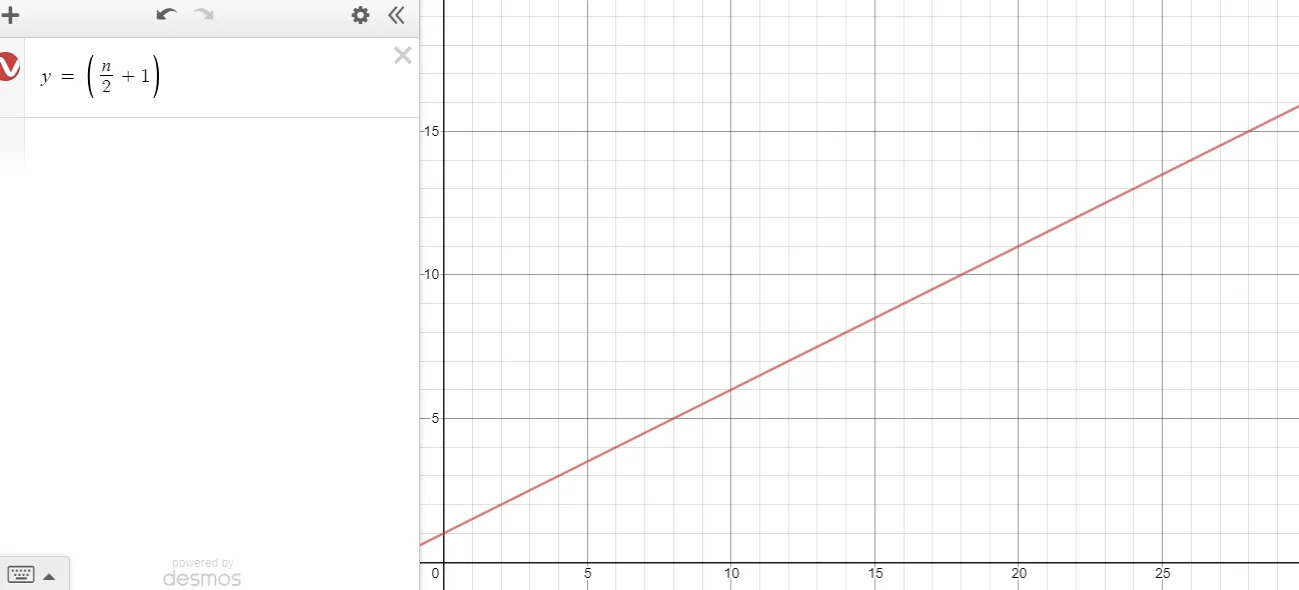

A ***Quantum Computer*** can fix that.

## The Quantum Deutsch-Jozsa Algorithm:

### Quantum Advantage:

Quantum Computers can solve this problem incredibly fast, even on huge input domains in the worst case. Where the number of queries a Classical Computer must ask the Oracle for is half the input domain, a Quantum Computer can solve the Deutsch-Jozsa Problem in one call to the Oracle.$$O(1)$$

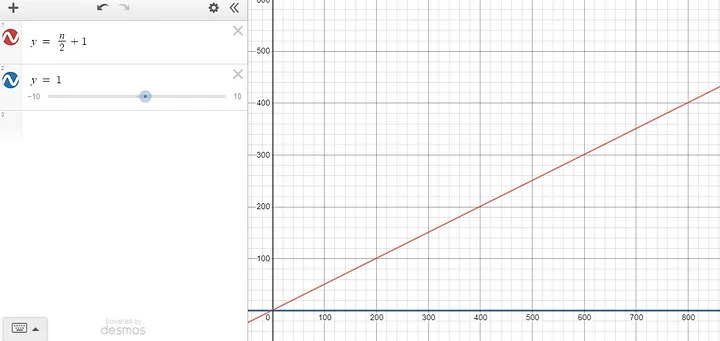

It sounds impossible to have an increase that good. O(1) is the best Run-Time complexity possible, and a Quantum Computer can consistently pull it off with 100% accuracy.
But it’s not impossible. And to prove that, let’s build an Algorithm that can do this!

### The Quantum Oracle:

Our Classical Algorithm doesn’t quite translate to the Quantum world. A fundamental rule of Quantum Algorithms is that they must be reversible, so we can always find input given a circuit and its output. Since just the output ‘0’ or ‘1’ doesn’t let us find a single, specific query with our classical model, we need to alter the algorithm.

Indeed, in the quantum realm, we need to adapt our approach to ensure reversibility, which is a fundamental requirement due to the principles of quantum mechanics. To make our classical algorithm compatible with quantum mechanics, we need to modify the oracle to ensure reversibility.

1. **Query and Auxiliary Input**: You, as the contestant, pass two things to the oracle: your query (a number from the list) and an auxiliary input. The query is what you want to know about, and the auxiliary input is just an extra piece of information that helps the oracle do its job.

2. **Oracle's Function**: The oracle then performs its secret function on the query (the number you gave) and changes the auxiliary input to match the result of that function. So, the auxiliary input gets transformed based on what the oracle does with your query.

3. **Preserving the Query**: While the auxiliary input changes according to the oracle's function, your original query stays the same. It's preserved, meaning it doesn't get altered by the oracle's operation.

In simple terms, you give the oracle two things: the number you're curious about (the query) and a little extra piece of information (the auxiliary input). The oracle then does its magic on your query, and whatever it does, it updates the auxiliary input to match. But your query itself remains unchanged throughout the process.

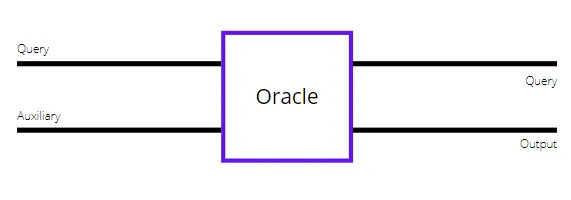

Now we’re ready.

### The Quantum Solution:

Imagine we have a magical box called the "Oracle". This Oracle takes in some input and gives us an output based on a secret rule inside it. We want to figure out what this rule is without actually seeing inside the box.

1. **Creating the Oracle**:

   - First, we create our Oracle. There are two types: Constant and Balanced.

   - In a Constant Oracle, no matter what input we give it, it always gives the same output. It's like a box that just randomly decides whether to give '0' or '1'.

   - In a Balanced Oracle, the output depends on the input, but it's balanced in such a way that for half of the possible inputs, it gives '0', and for the other half, it gives '1'.he superposition and the Auxiliary are linked and need to be operated on — passing Output onto the Auxiliary. For this, we’ll need two-qubit gates.
     
   - We have a choice now — do we use a CX Gate, and bit-flip, or a CZ Gate, and phase-flip? Phase flips don’t affect measurement outcomes — but we want our Auxiliary to show the output of the Oracle in measurement. A CX Gate upon our Query and Auxiliary should give us what we want.

2. **Using Superposition**:

   - Instead of giving the Oracle one input at a time, we get a bit fancy. We send in all possible inputs at once, sort of like sending in a whole crowd of people instead of just one person. This is called superposition.

   - So, if we have 2 input bits, we send in a superposition of all possible combinations: '00', '01', '10', and '11'.$$\frac{1}{2}\{|00\rangle + |01\rangle + |10\rangle +|11\rangle\}$$

3. **Sneaky Trick: Phase Kickback**:

   - Now, here's where the magic comes in. We use a clever trick called "Phase Kickback". It's like sending in spies to peek inside the Oracle without anyone noticing.

   - By setting up our inputs in a special way, we can learn something about the Oracle's secret rule just by observing how our spies (or qubits) behave after interacting with the Oracle.

4. **Checking the Relative Phase**:

   - After our qubits interact with the Oracle, we check something called the "relative phase". It's a bit like checking if our spies come back with different hairstyles after visiting the Oracle.

   - If the relative phase stays the same, it means the Oracle is Constant. It always gives the same answer, no matter what.

   - But if the relative phase changes, it means the Oracle is Balanced. It's giving us different answers depending on the input.

5. **Finding Out the Oracle Type**:

   - Once we've observed the relative phase change, indicating that the Oracle is Balanced, we want to know more.
   
   - Imagine we have spies (our qubits) sneaking into the Oracle to gather information about its behavior. These spies are sent in with a specific mission: to figure out if the Oracle is constantly giving '0' or '1' as output for each input.
   
   - Now, after the spies interact with the Oracle, they come back with some information. We need to decode this information to determine the Oracle's type.
   
   - If the spies consistently come back with the message "We observed the output as '0'!", it means the Oracle is Constantly Zero.
   
   - On the other hand, if the spies consistently report "We observed the output as '1'!", it means the Oracle is Constantly One.
   
   - So, by carefully analyzing the reports from our spies (the measured outputs), we can determine whether the Oracle always outputs '0', always outputs '1', or if it's truly balanced, meaning it outputs '0' and '1' in an even manner.
   
   - Just like spies gathering intelligence from a mission, our qubits gather information from their interaction with the Oracle, helping us uncover its hidden nature.

So, by using superposition and Phase Kickback, we can unravel the mystery of the Oracle's rule without ever opening the box. It's like solving a puzzle using secret agents and magic tricks!

While it has limited real-world applications, it’s an awesome representation of the sheer power behind Quantum Computing. For a process which scales to massive numbers with big data, the ability to perfectly discern the contents of an Oracle in a single Query is nothing short of miraculous. Additionally, the techniques that Deutsch-Jozsa’s discovery brought to the Quantum Computing field now find widespread use, like in Grover’s Algorithm, one of the most useful and powerful Quantum Algorithms which we’ll be covering in a future post.


We’ll take a step-by-step look at how to convert our process from the last guide into real, functioning code. We’ll break down and understand the mathematics behind the process, and find Gates that represent our ideas as a true Quantum Algorithm, before running our results on Density matrix Simulation!

# Program Implementation :

## Setup:

In [1]:
# We want Qiskit, of course — it’s how we’ll construct our Quantum Circuit.
# In order to display our Circuit Diagrams clearly, let’s import Matplotlib, shortened to mpl.
# Finally, to control parts of our Oracle, let’s import choice and randint from the random library.

import qiskit
import matplotlib as mpl
from random import choice, randint

## Initialise Qubits :

First of all, our circuit begins with inputting values to the Oracle. Two values, our Query and Oracle.

Let’s move down one layer of abstraction. Instead of thinking of the Query as a number, like ‘4’ or ‘20’, let’s think of it in bits. Qubits, actually.
This is a fairly simple step, as all we have to do is convert our number into binary form.

For the purposes of this guide, we’ll use a three-Qubit Query. That means our input domain is all the numbers from 000 to 111 (0 to 7), 8 numbers wide.
Our Auxiliary is a single bit — it’ll become the single ‘0’ or ‘1’ output of the Problem.

That’s our Qubits secured. Let’s setup an equal number of Classical Bits, so we can measure all of our Qubits.

Great! Now, we can setup the start of our Circuit!

In [2]:
n = 3    #the size of our Query, NOT including the Auxiliary
circuit = qiskit.QuantumCircuit(n+1,n+1)   #create circuit including Auxiliary qubit & bit

## Oracle Input:

Part of our plan for the massive speedup was in Superposition.We wanted to be able to pass a superposition of every possible Query into the Oracle at once. Whenever you’re trying to make a superposition, the Hadamard Gate is a good way to go. A Hadamard Gate transforms our basis states 0 and 1 into superpositions. These are a linear combination of the basis 0 and 1 states.

This is the Truth Table of the Hadamard Gate.
|INPUT QUBIT|OUTPUT QUBIT|
|-----------|------------|
|$|0\rangle$|$\frac{1}{\sqrt{2}}(|0\rangle +|1\rangle)$|
|$|1\rangle$|$\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle)$|
|$\frac{1}{\sqrt{2}}(|0\rangle +|1\rangle)$|$|0\rangle$|
|$\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle)$|$|1\rangle$|

$$\textit{Hadamard Truth Table, mapping {|0\rangle} to {|+\rangle}, {|1\rangle} to {|-\rangle}, and vice versa}$$

You might notice that the Hadamard Gate is its own inverse. Applying the Hadamard Gate to state **0** brings it to a superposition which we’ll call **‘+’** due to the plus sign in the middle. Applying the Hadamard Gate to state **+** brings it back to **0**. 

Similarly, applying the Hadamard Gate twice transforms **1** to **‘-’**, which then transforms back into **1**.

For now, all we need is to place our Query qubits, which are always initialised in the zero state, into superposition. This is easy enough; all we have to do is loop through the Query, applying the Hadamard Gate to each one of these.

To do this, we loop through all numbers between **0 and ’n’**, the size of our Query. Remember that the n-th qubit is the Query — Python stops this loop at n-1 , which is why we can use it to describe just the Query.

To apply a Hadamard Gate to each qubit in the list, we use **‘circuit.h(i)’** where i loops through elements in the list — also keep in mind that lists start at the zero index.

Continuing for all qubits in the Query is fairly simple.

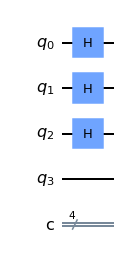

In [3]:
for i in range(0,n):
    circuit.h(i)
circuit.draw('mpl')#Hadamard Gate applied to three-qubit Query

Great! Let’s reassure ourselves that this really is a superposition of every state, by delving into their mathematical representations. We already know that each of our Qubits has been mapped to the + state. So, let’s take the product of those.

$$\biggr(\frac{|0\rangle +|1\rangle}{\sqrt{2}}\biggr)\biggr(\frac{|0\rangle +|1\rangle}{\sqrt{2}}\biggr)\biggr(\frac{|0\rangle +|1\rangle}{\sqrt{2}}\biggr)$$
$$\textit{Three {|+\rangle} states multiplied}$$

The multiplication is fairly simple — simply combine the kets and multiply the bottom.
$$\biggr(\frac{|000\rangle +|001\rangle + |010\rangle +|011\rangle +|100\rangle +|101\rangle +|110\rangle +|111\rangle}{\sqrt{8}}\biggr)$$
$$\textit{The full Query’s state}$$
That’s every single possible state that can be made with 3 Qubits. Great!

Since the Auxiliary State is prepared carefully to allow Phase Kickback to occur in the Oracle, it’ll help us to know exactly what goes on in that Oracle.

## The Oracle :

We’ve got 3 cases here to choose from — our **Constantly Zero, Constantly One, and Balanced Oracles**.

Before we get into those, let’s setup our Oracle. It can help to think of this as a subroutine — we simply call the function on our Circuit, and it tell us our Output is. We’re sadly not allowed to look inside.

```python
    circuit, oracle_type = Oracle(circuit,n)
```

We need to pass our Circuit to the Oracle, so it can operate on it. We’ll also pass **’n’**, our Query’s length in, just for convenience.

Firstly, to choose which type of Oracle we’re using, we’ll simply randomly choose from the three. This makes sure that we haven’t ‘rigged’ the circuit, by pre-programming in the type of Oracle we have.

Let’s also add some barriers just so we can properly isolate our Oracle from the rest of the circuit.
```python
def Oracle(circuit,n):     #begin our function
    oracle_type = choice(['Constant0','Constant1','Balanced'])
    circuit.barrier()
```

Within the Oracle, we want to check which Oracle type we’re using — otherwise the Oracle won’t know which operations to carry out. For this, we can simply use an if statement for each case.

```python
    if oracle_type == 'Balanced':
        #code
    elif oracle_type == 'Constant0':
        #code
    elif oracle_type == 'Constant1':
        #code
    circuit.barrier()
    return circuit, oracle_type
```
We’ll round off the end of the Oracle with another barrier, then return the new Circuit with the Oracle applied. Let’s also return oracle_type, so that we can check it against the type of oracle our algorithm predicts. It’s always good to know if it’s working!

## Balanced Oracle :

Starting at the top, let’s devise our Balanced Oracle. Here, we decided to use the CX Gates as our method of ‘splitting’ our groups, being controlled by the Query and targeting the Auxiliary.

The reason this works can be visualised if we return to classical bits momentarily.

Each time you apply a CX Gate from the Query to Auxiliary, you flip the Auxiliary if the Query bit is in state 1. Applying CX Gates from a state where only one of the Query bits are 1, like 001, means the Auxiliary flips once and remains that way. It would change from 0 to 1. However, the X Gate is its own inverse — applying it twice will remove its effect. So, if we have a Query where two bits are 1, like 011, the Auxiliary is flipped twice — and remains as 0.

You can see where this is going. An even number of bits in the ‘1’ state cause the CX Gates to cancel out their effect on the Auxiliary, whereas an odd number causes the Auxiliary to be flipped overall.

For our Query, we have 8 possible combinations. In the range 0–8, exactly four numbers have an even number of ‘1’s, and four are even. These two groups are the ‘0’ and ‘1’ group respectively.

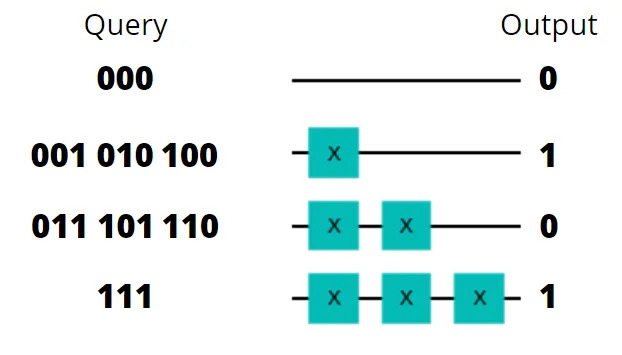
$$\textit{Different Outputs with all possible Queries — 2 of each.}$$

Like when choosing our Oracle’s Type, we want to guarantee this is a true Black Box. Right now, we know exactly which states will lead to which outputs, thanks to the above image; so, let’s randomly flip some qubits of the query.

This still means exactly half of the input domain will be in the zero or one group — but now, we don’t know which half. Feel free to try to calculate this, and prove that our Oracle works properly!

Now let’s get this in code.

Firstly, let’s decide which qubits to randomly flip. We’ll do this by randomly creating a 3-digit binary string, and take ‘1’ as an instruction to flip, and ‘0’ as an instruction not to.
```python
if oracle_type == 'Balanced':
    flipGates = randint(0,(2**n)-1)    #random binary num between
                                       #0 and 7
    flipGates = format(flipGates, '0'+str(n)+'b') #convert to binary
```

Then we can work on the gates. For each ‘1’ in the string ‘flipGates’, we’ll apply an X Gate to the qubit at that index. 

- For example, if flipGates = '001' , then we flip the last qubit in the Query.

Afterwards, we’ll apply our CX Gate, controlled by every Query qubit in turn, and targeted on the Auxiliary. That splits our input group perfectly.

Finally, to preserve our input, we’ll undo the X Gate. Since X Gates are their own inverse, we can simply perform the exact same operation we used to apply them!

```python
for qbit in range(0,len(flipGates)):   #iterate through flipGates
    if flipGates[qbit] == '1':
        circuit.x(qbit)     #flip qubit if necessary
for qbit in range(0,n):    #CX Gate controlled on every query qubit
    circuit.cx(qbit,n+1)   #and targeting auxiliary qubit
for qbit in range(0,len(flipGates)):   #unflip qubits so output
    if flipGates[qbit] == '1':         #reveals nothing except
        circuit.x(qbit)                #what the original input was
```

#### For flipGates == '010' , our Oracle looks like this: 
( This part is an example of the code that shows how the circuit is) 

Balanced
oracle_type = Balanced


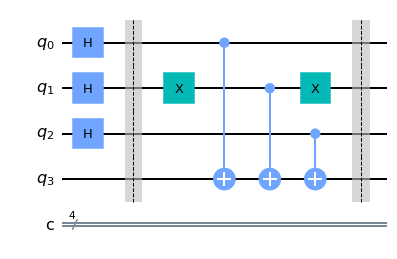

In [4]:
n = 3  # the size of our Query, NOT including the Auxiliary
c = qiskit.QuantumCircuit(n + 1, n + 1)  # create circuit including Auxiliary qubit & bit

for i in range(n):
    c.h(i)


def Oracle(c, n):  # begin our function
    oracle_type = 'Balanced'
    print(oracle_type)
    c.barrier()

    if oracle_type == 'Balanced':
        flipGates = '010'
        for qbit in range(0,len(flipGates)):
            if flipGates[qbit] == '1':
                c.x(qbit)  # flip qubit if necessary
        for qbit in range(0,n):  # CX Gate controlled on every query qubit
            c.cx(qbit, n)  # and targeting auxiliary qubit
        for qbit in range(0,len(flipGates)):
            if flipGates[qbit] == '1':  # unflip qubits so output
                c.x(qbit)  # reveals nothing except
        c.barrier()
    elif oracle_type == 'Constant0':
        # Your code for Constant0 oracle
        pass
    elif oracle_type == 'Constant1':
        # Your code for Constant1 oracle
        pass

    return c, oracle_type


c, oracle_type = Oracle(c, n)
print(f"oracle_type = {oracle_type}")
c.draw("mpl")


In [5]:
'''
Deutsch - Jozsa Benchmark Program - Qsim
'''
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer
from qiskit import *


import numpy as np
import matplotlib.pyplot as plt 
import sys, time

#import metrics
#import execute as ex 

# Noise parameters
options = { } #if Noise is None

options_noisy = { #if Noise is not None
    'plot': False,
    "thermal_factor": 0.0,
    'show_partition': False,
    "decoherence_factor": 0.9,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 0.9,
    "decay_factor": 0.9,
    "rotation_error": {'rx':[1.0, 0.0], 'ry':[1.0, 0.0], 'rz':[1.0, 0.0]},
    "tsp_model_error": [1.0, 0.0],
}

# Selection of basis gate set for transpilation
# Note: selector 1 is a hardware agnostic gate set
basis_selector = 2
basis_gates_array = [
    [],
    ['rx', 'ry', 'rz', 'cx'],       # a common basis set, default
    ['cx', 'rz', 'sx', 'x'],        # IBM default basis set
    ['rx', 'ry', 'rxx'],            # IonQ default basis set
    ['h', 'p', 'cx'],               # another common basis set
    ['u', 'cx']                     # general unitaries basis gates
]

#Benchmark Name
benchmark_name = "Duestch - Jozsa Qsim"

np.random.seed(0)

# This sets the seed of the random number generator to the specified value, in this case, 0. 
# Setting the seed to a specific value ensures that the sequence of random numbers 
# generated is the same every time the program is run.

verbose = False

# When verbose is set to False, it usually means that the program will run without providing
# detailed or extra information, resulting in a more concise and less informative output.

# saved circuits for display
QC_ = None
C_ORACLE_ = None
B_ORACLE_ = None

In [6]:
############# Circuit Definition ################

# Define constant_oracle function
def constant_oracle(input_size, num_qubits):
    qc = QuantumCircuit(num_qubits, name=f"Uf")

    output = np.random.randint(2)
    if output == 1:
        qc.x(input_size)

    global C_ORACLE_
    if C_ORACLE_ is None or num_qubits <= 6:
        if num_qubits < 9:
            C_ORACLE_ = qc

    return qc

In [7]:
# Define balanced_oracle function
def balanced_oracle(input_size, num_qubits):
    qc = QuantumCircuit(num_qubits, name=f"Uf")

    b_str = "10101010101010101010"  # permit input_string up to 20 chars
    for qubit in range(input_size):
        if b_str[qubit] == '1':
            qc.x(qubit)

    qc.barrier()

    for qubit in range(input_size):
        qc.cx(qubit, input_size)

    qc.barrier()

    for qubit in range(input_size):
        if b_str[qubit] == '1':
            qc.x(qubit)

    global B_ORACLE_
    if B_ORACLE_ is None or num_qubits <= 6:
        if num_qubits < 9:
            B_ORACLE_ = qc

    return qc

In [8]:
# Define DeutschJozsa function
def DeutschJozsa(num_qubits, type):
    input_size = num_qubits - 1

    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(input_size)
    qc = QuantumCircuit(qr, cr, name=f"dj-{num_qubits}-{type}")

    for qubit in range(input_size):
        qc.h(qubit)
    qc.x(input_size)
    qc.h(input_size)

    qc.barrier()

    if type == 0:
        Uf = constant_oracle(input_size, num_qubits)
    else:
        Uf = balanced_oracle(input_size, num_qubits)

    qc.append(Uf, qr)

    qc.barrier()

    for qubit in range(num_qubits):
        qc.h(qubit)

    qc.x(input_size)

    qc.barrier()

    for i in range(input_size):
        qc.measure(i, i, basis='Ensemble', add_param='Z')

    global QC_
    if QC_ is None or num_qubits <= 2:
        if num_qubits < 9:
            QC_ = qc

    return qc

In [9]:
# if main, execute method
#if __name__ == '__main__': run()

In [10]:
############################################
# DATA ANALYSIS - FIDELITY CALCULATIONS

## Uniform distribution function commonly used
def rescale_fidelity(fidelity, floor_fidelity, new_floor_fidelity):
    """
    Linearly rescales our fidelities to allow comparisons of fidelities across benchmarks
    
    fidelity: raw fidelity to rescale
    floor_fidelity: threshold fidelity which is equivalent to random guessing
    new_floor_fidelity: what we rescale the floor_fidelity to 

    Ex, with floor_fidelity = 0.25, new_floor_fidelity = 0.0:
        1 -> 1;
        0.25 -> 0;
        0.5 -> 0.3333;
    """
    rescaled_fidelity = (1-new_floor_fidelity)/(1-floor_fidelity) * (fidelity - 1) + 1
    
    # ensure fidelity is within bounds (0, 1)
    if rescaled_fidelity < 0:
        rescaled_fidelity = 0.0
    if rescaled_fidelity > 1:
        rescaled_fidelity = 1.0
    
    return rescaled_fidelity
    
def uniform_dist(num_state_qubits):
    dist = {}
    for i in range(2**num_state_qubits):
        key = bin(i)[2:].zfill(num_state_qubits)
        dist[key] = 1/(2**num_state_qubits)
    return dist                

### Analysis methods to be expanded and eventually compiled into a separate analysis.py file
import math, functools

def hellinger_fidelity_with_expected(p, q):
    """ p: result distribution, may be passed as a counts distribution
        q: the expected distribution to be compared against

    References:
        `Hellinger Distance @ wikipedia <https://en.wikipedia.org/wiki/Hellinger_distance>`_
        Qiskit Hellinger Fidelity Function
    """
    p_sum = sum(p.values())
    q_sum = sum(q.values())

    if q_sum == 0:
        print("ERROR: polarization_fidelity(), expected distribution is invalid, all counts equal to 0")
        return 0

    p_normed = {}
    for key, val in p.items():
        if p_sum != 0:
            p_normed[key] = val/p_sum
        else:
            p_normed[key] = 0

    q_normed = {}
    for key, val in q.items():
        q_normed[key] = val/q_sum

    total = 0
    for key, val in p_normed.items():
        if key in q_normed.keys():
            total += (np.sqrt(val) - np.sqrt(q_normed[key]))**2
            del q_normed[key]
        else:
            total += val
    total += sum(q_normed.values())
    
    # in some situations (error mitigation) this can go negative, use abs value
    if total < 0:
        print(f"WARNING: using absolute value in fidelity calculation")
        total = abs(total)
        
    dist = np.sqrt(total)/np.sqrt(2)
    fidelity = (1-dist**2)**2

    return fidelity

def polarization_fidelity(counts, correct_dist, thermal_dist=None):
    """
    Combines Hellinger fidelity and polarization rescaling into fidelity calculation
    used in every benchmark

    counts: the measurement outcomes after `num_shots` algorithm runs
    correct_dist: the distribution we expect to get for the algorithm running perfectly
    thermal_dist: optional distribution to pass in distribution from a uniform
                  superposition over all states. If `None`: generated as 
                  `uniform_dist` with the same qubits as in `counts`
                  
    returns both polarization fidelity and the hellinger fidelity

    Polarization from: `https://arxiv.org/abs/2008.11294v1`
    """
    num_measured_qubits = len(list(correct_dist.keys())[0])
    print(num_measured_qubits)
    
    counts = {k.zfill(num_measured_qubits): v for k, v in counts.items()}
    
    # calculate hellinger fidelity between measured expectation values and correct distribution
    hf_fidelity = hellinger_fidelity_with_expected(counts,correct_dist)
    
    # to limit cpu and memory utilization, skip noise correction if more than 16 measured qubits
    if num_measured_qubits > 16:
        return { 'fidelity':hf_fidelity, 'hf_fidelity':hf_fidelity }

    # if not provided, generate thermal dist based on number of qubits
    if thermal_dist == None:
        thermal_dist = uniform_dist(num_measured_qubits)

    # set our fidelity rescaling value as the hellinger fidelity for a depolarized state
    floor_fidelity = hellinger_fidelity_with_expected(thermal_dist, correct_dist)

    # rescale fidelity result so uniform superposition (random guessing) returns fidelity
    # rescaled to 0 to provide a better measure of success of the algorithm (polarization)
    new_floor_fidelity = 0
    fidelity = rescale_fidelity(hf_fidelity, floor_fidelity, new_floor_fidelity)

    return { 'fidelity':fidelity, 'hf_fidelity':hf_fidelity }



In [11]:
def det_type(input_size, circuit_type):
    if circuit_type == 0:
        key = '0' * (input_size-1)
    else:
        #key = '1' * input_size
        key = '1'*(input_size-1)
    correct_dist = {key: 1.0}
    return correct_dist

qc of 3 qubits of type 0
      ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░  ░ ┌─┐ ░  ░     ░ 
q0_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░──░─┤M├─░──░─────░─
      ├───┤      ░ │     │ ░ ├───┤      ░  ░ └╥┘ ░  ░ ┌─┐ ░ 
q0_1: ┤ H ├──────░─┤1 Uf ├─░─┤ H ├──────░──░──╫──░──░─┤M├─░─
      ├───┤┌───┐ ░ │     │ ░ ├───┤┌───┐ ░  ░  ║  ░  ░ └╥┘ ░ 
q0_2: ┤ X ├┤ H ├─░─┤2    ├─░─┤ H ├┤ X ├─░──░──╫──░──░──╫──░─
      └───┘└───┘ ░ └─────┘ ░ └───┘└───┘ ░  ░  ║  ░  ░  ║  ░ 
c0: 2/════════════════════════════════════════╩════════╩════
                                              0        1    
{'000': 1.0, '001': 0.0, '010': 0.0, '011': 0.0, '100': 0.0, '101': 0.0, '110': 0.0, '111': 0.0}
{'00': 1000, '01': 0, '10': 0, '11': 0}
2
qc of 3 qubits of type 1
       ┌───┐      ░ ┌─────┐ ░ ┌───┐      ░  ░ ┌─┐ ░  ░     ░ 
q27_0: ┤ H ├──────░─┤0    ├─░─┤ H ├──────░──░─┤M├─░──░─────░─
       ├───┤      ░ │     │ ░ ├───┤      ░  ░ └╥┘ ░  ░ ┌─┐ ░ 
q27_1: ┤ H ├──────░─┤1 Uf ├─░─┤ H ├──────░──░──╫──░──░─┤M├─░─
       ├───┤┌─

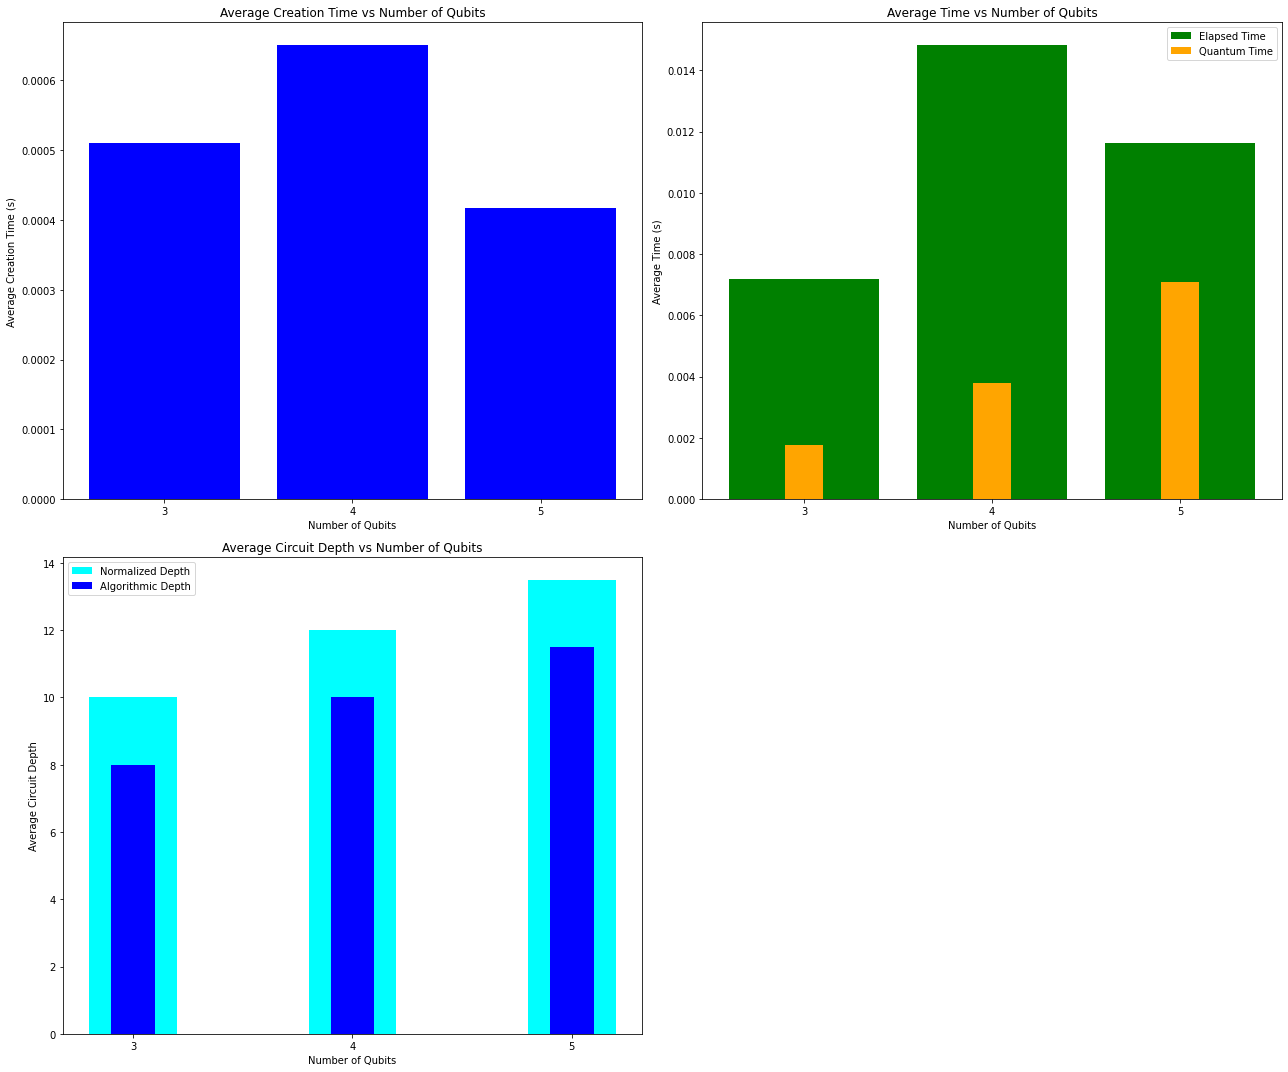

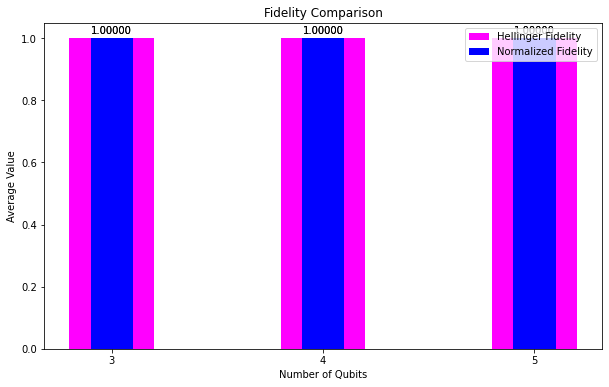

{3: [1.0, 1.0], 4: [1.0, 1.0], 5: [1.0, 1.0]}
{3: [1.0, 1.0], 4: [1.0, 1.0], 5: [1.0, 1.0]}
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]


In [12]:
# Function to calculate circuit depth
def calculate_circuit_depth(qc):
    # Calculate the depth of the circuit
    depth = qc.depth()
    return depth

def combine_probabilities(prob, num_qubits):
    proj_prob = {}
    input_size = num_qubits-1
    # Generate binary combinations for n qubits
    binary_combinations = [bin(i)[2:].zfill(input_size) for i in range(2**input_size)]

    # Combine probabilities and errors for each projection
    if input_size<2:
        for i in range(2**(input_size-1)):
            proj_prob[bin(i)[2:].zfill(input_size-1)] = prob.get(bin(i)[2:].zfill(input_size-1) + '0', 0) + prob.get(bin(i)[2:].zfill(input_size-1) + '1', 0)
    else:
        for i in range(2**(input_size-1)):
            proj_prob[bin(i)[2:].zfill(input_size-1) + '0'] = sum(prob[bin(i)[2:].zfill(input_size-1) + '0' + str(j)] for j in range(2))
            proj_prob[bin(i)[2:].zfill(input_size-1) + '1'] = sum(prob[bin(i)[2:].zfill(input_size-1) + '1' + str(j)] for j in range(2))

    return proj_prob

def calculate_transpiled_depth(qc,basis_selector):
    # use either the backend or one of the basis gate sets
    if basis_selector == 0:
        qc = transpile(qc, backend)
        
    else:
        basis_gates = basis_gates_array[basis_selector]
        qc = transpile(qc, basis_gates=basis_gates, seed_transpiler=0)
    transpiled_depth = qc.depth()
    return transpiled_depth

def plot_data(fidelity_data, Hf_fidelity_data, title):
    avg_fidelity_means = []
    avg_Hf_fidelity_means = []
    avg_num_qubits_values = list(fidelity_data.keys())

    # Calculate the average fidelity and Hamming fidelity for each unique number of qubits
    for num_qubits in avg_num_qubits_values:
        avg_fidelity = np.average(fidelity_data[num_qubits])
        avg_fidelity_means.append(avg_fidelity)

        avg_Hf_fidelity = np.mean(Hf_fidelity_data[num_qubits])
        avg_Hf_fidelity_means.append(avg_Hf_fidelity)
    
    

    # Plot the data
    x = np.arange(len(avg_num_qubits_values))
    
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    rects2 =ax.bar(x, avg_Hf_fidelity_means, width=0.4, label='Hellinger Fidelity',color="magenta")
    rects1 = ax.bar(x, avg_fidelity_means, width=0.2, label='Normalized Fidelity', color="blue")
    
    ax.set_xlabel('Number of Qubits')
    ax.set_ylabel('Average Value')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(avg_num_qubits_values)
    ax.legend()
    
    # Add labels to the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.5f}'.format(height),  # Formatting to two decimal places
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)
    
    plt.show()
    print(fidelity_data)
    print(Hf_fidelity_data)
    print(avg_fidelity_means)
    print(avg_Hf_fidelity_means)
    
backend = BasicAer.get_backend('dm_simulator')


# Function to execute the benchmark program, accumulate metrics, and calculate circuit depths
def run_and_accumulate_metrics_with_depth(min_qubits=3, max_qubits=5, skip_qubits=1, max_circuits=3, num_shots=1000):
    creation_times = []
    elapsed_times = []
    quantum_times = []
    circuit_depths = []
    transpiled_depths = []
    fidelity_data = {}
    Hf_fidelity_data = {}
    
    # Execute Benchmark Program N times for multiple circuit sizes
    for num_qubits in range(min_qubits, max_qubits + 1, skip_qubits):
        fidelity_data[num_qubits] = []
        Hf_fidelity_data[num_qubits] = []
        num_circuits = min(2, max_circuits)
        for type in range(num_circuits):
            ts = time.time()
            qc = DeutschJozsa(num_qubits, type)

            #creation time
            creation_time = time.time() - ts
            creation_times.append(creation_time)
            print(f"qc of {num_qubits} qubits of type {type}")
            print(qc)
            # collapse the sub-circuit levels used in this benchmark (for qiskit)
            qc=qc.decompose()
            
            # Calculate circuit depth
            depth = calculate_circuit_depth(qc)
            circuit_depths.append(depth)

            # Calculate transpiled circuit depth
            transpiled_depth = calculate_transpiled_depth(qc,basis_selector)
            transpiled_depths.append(transpiled_depth)

            #execution
            ts = time.time()
            job = execute(qc, backend, shots=num_shots, **options)
            result = job.result()
            elapsed_time = time.time() - ts
            elapsed_times.append(elapsed_time)
            
            # Calculate quantum processing time (excluding creation time)
            quantum_time = result.results[0].running_time_taken
            quantum_times.append(quantum_time)

            #ensemble probability
            prob = result.results[0].data.ensemble_probability
            print(prob)
            proj_prob = combine_probabilities(prob,num_qubits)
            counts = proj_prob
            
            for key in counts.keys():
               counts[key] = int(counts[key] * num_shots)
            print(counts)
            correct_dist = det_type(num_qubits, type)

            #fidelity
            fidelity_dict = polarization_fidelity(counts, correct_dist)
            fidelity_data[num_qubits].append(fidelity_dict['fidelity'])
            Hf_fidelity_data[num_qubits].append(fidelity_dict['hf_fidelity'])
    
    # print a sample circuit
    print("Sample Circuit:"); print(QC_ if QC_ != None else "  ... too large!")
    print("\nConstant Oracle 'Uf' ="); print(C_ORACLE_ if C_ORACLE_ != None else " ... too large or not used!")
    print("\nBalanced Oracle 'Uf' ="); print(B_ORACLE_ if B_ORACLE_ != None else " ... too large or not used!")
    
    return creation_times, elapsed_times, quantum_times, circuit_depths, transpiled_depths, fidelity_data, Hf_fidelity_data

# Define the range of qubits for the x-axis
num_qubits_range = range(3, 5+1)


# Execute the benchmark program, accumulate metrics, and calculate circuit depths
creation_times, elapsed_times, quantum_times, circuit_depths,transpiled_depths, fidelity_data, Hf_fidelity_data = run_and_accumulate_metrics_with_depth()

#avg_fidelity_means, avg_Hf_fidelity_means = fidelity_data()

# Calculate average creation time, elapsed time, quantum processing time, and circuit depth for each number of qubits
avg_creation_times = [np.mean(creation_times[i:i+2]) for i in range(0, len(creation_times), 2)]
avg_elapsed_times = [np.mean(elapsed_times[i:i+2]) for i in range(0, len(elapsed_times), 2)]
avg_quantum_times = [np.mean(quantum_times[i:i+2]) for i in range(0, len(quantum_times), 2)]
avg_circuit_depths = [np.mean(circuit_depths[i:i+2]) for i in range(0, len(circuit_depths), 2)]
avg_transpiled_depths = [np.mean(transpiled_depths[i:i+2]) for i in range(0, len(transpiled_depths), 2)]


# Plot histograms for average creation time, average elapsed time, average quantum processing time, and average circuit depth versus the number of qubits
plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1)
plt.xticks(range(min(num_qubits_range), max(num_qubits_range)+1, 1))
plt.bar(num_qubits_range, avg_creation_times, color='blue')
plt.xlabel('Number of Qubits')
plt.ylabel('Average Creation Time (s)')
plt.title('Average Creation Time vs Number of Qubits')

plt.subplot(2, 2, 2)
plt.xticks(range(min(num_qubits_range), max(num_qubits_range)+1, 1))
plt.bar(num_qubits_range, avg_elapsed_times, color='green',label ='Elapsed Time')
plt.bar(num_qubits_range, avg_quantum_times, color='orange',label ='Quantum Time', width=0.2)
plt.xlabel('Number of Qubits')
plt.ylabel('Average Time (s)')
plt.title('Average Time vs Number of Qubits')
plt.legend()

plt.subplot(2, 2, 3)
plt.xticks(range(min(num_qubits_range), max(num_qubits_range)+1, 1))
plt.bar(num_qubits_range, avg_transpiled_depths, color='cyan', label='Normalized Depth', width=0.4)  # Adjust width here
plt.bar(num_qubits_range, avg_circuit_depths, color='blue', label='Algorithmic Depth', width=0.2)  # Adjust width here
plt.xlabel('Number of Qubits')
plt.ylabel('Average Circuit Depth')
plt.title('Average Circuit Depth vs Number of Qubits')
plt.legend()


plt.tight_layout()
plt.show()

# Calculate the fidelity data
plot_data(fidelity_data, Hf_fidelity_data, "Fidelity Comparison")
